In [1]:
import tensorflow as tf

In [14]:
import cv2
import imghdr
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_dir = 'data'

In [4]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [9]:
img = cv2.imread(os.path.join('data','happy','8cxKy5g9i.jpg'))

In [23]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [25]:
data_iterator = data.as_numpy_iterator()

In [28]:
batch = data_iterator.next()

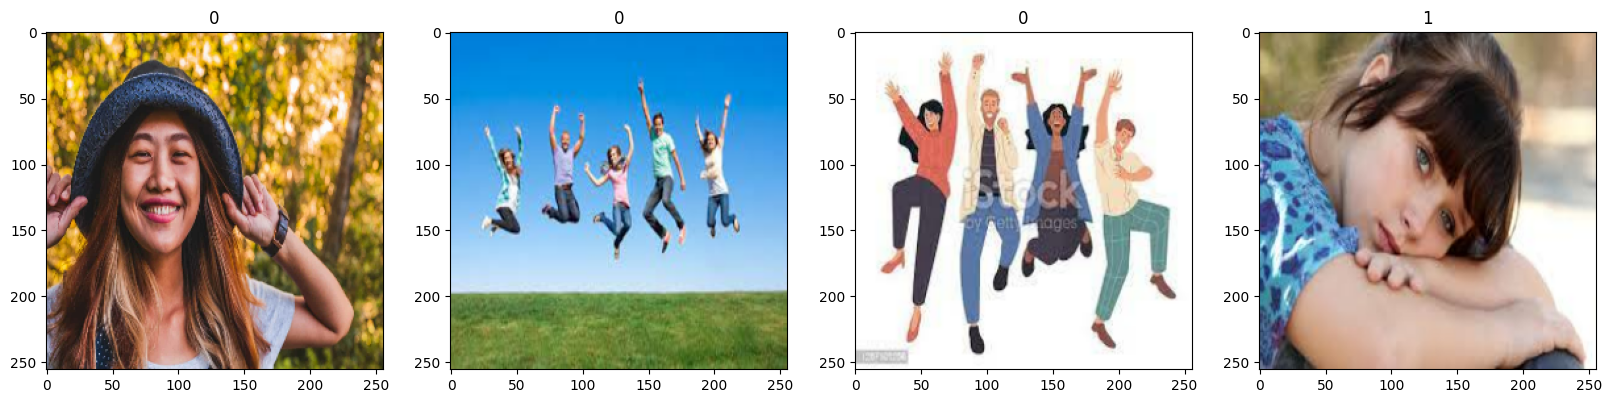

In [29]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

sad = 1
happy = 0

In [33]:
data = data.map(lambda x,y: (x/255, y))


In [34]:
scaled_iterator = data.as_numpy_iterator()

In [35]:
batch = scaled_iterator.next()

In [36]:
batch[0].max()

1.0

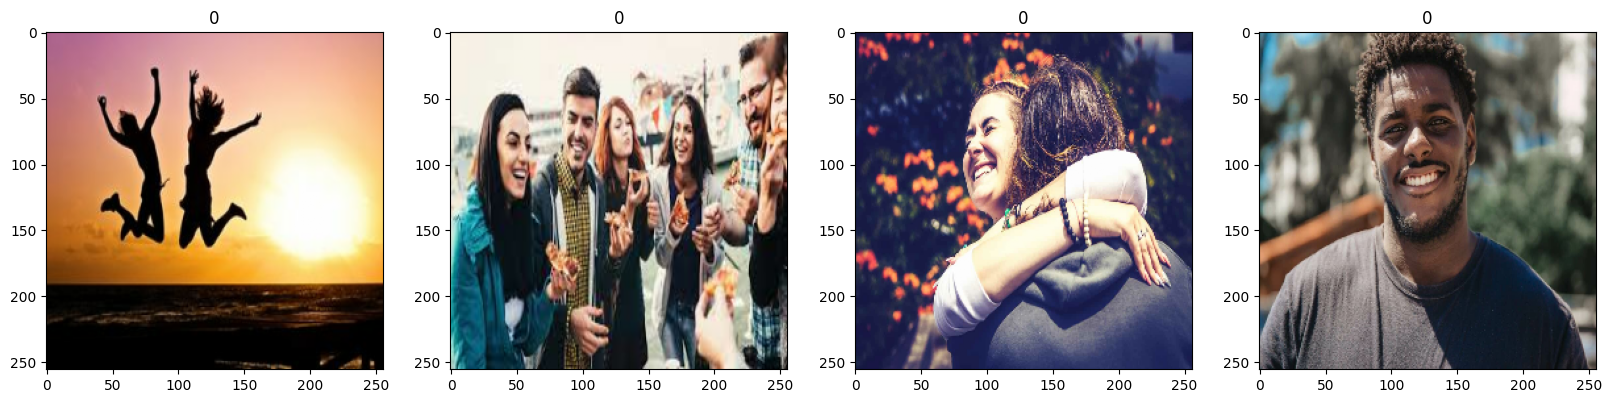

In [37]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [44]:
train_size = int(len(data)* .7)
val_size = int(len(data)* .2)
test_size = int(len(data)*.1)

In [45]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [48]:
len(val)

2

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [57]:
model1 = Sequential()


In [58]:
model1.add(Conv2D(16, (3,3),1, activation = 'relu', input_shape=(256,256,3)))
model1.add(MaxPooling2D())

model1.add(Conv2D(32, (3,3),1, activation = 'relu'))
model1.add(MaxPooling2D())

model1.add(Conv2D(16, (3,3),1, activation = 'relu'))
model1.add(MaxPooling2D())

model1.add(Flatten())

model1.add(Dense(256, activation='relu'))
model1.add(Dense(1, activation ='sigmoid'))

In [59]:
model1.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [60]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 16)       

In [63]:
logdir = 'logs'

In [64]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [65]:
hist = model1.fit(train, epochs=20,validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 5s 482ms/step - loss: 1.0942 - accuracy: 0.5580 - val_loss: 0.6018 - val_accuracy: 0.5156
Epoch 2/20
7/7 [==============================] - 4s 469ms/step - loss: 0.6301 - accuracy: 0.6384 - val_loss: 0.6212 - val_accuracy: 0.8125
Epoch 3/20
7/7 [==============================] - 4s 471ms/step - loss: 0.5930 - accuracy: 0.7277 - val_loss: 0.4873 - val_accuracy: 0.8281
Epoch 4/20
7/7 [==============================] - 5s 505ms/step - loss: 0.5409 - accuracy: 0.7411 - val_loss: 0.4671 - val_accuracy: 0.8438
Epoch 5/20
7/7 [==============================] - 5s 478ms/step - loss: 0.4875 - accuracy: 0.7991 - val_loss: 0.4711 - val_accuracy: 0.8281
Epoch 6/20
7/7 [==============================] - 4s 453ms/step - loss: 0.3910 - accuracy: 0.8438 - val_loss: 0.3641 - val_accuracy: 0.7969
Epoch 7/20
7/7 [==============================] - 4s 454ms/step - loss: 0.3125 - accuracy: 0.8705 - val_loss: 0.3132 - val_accuracy: 0.9062
Epoch 8/20
7/7 [====

In [66]:
hist.history

{'loss': [1.094238519668579,
  0.6301330327987671,
  0.592951774597168,
  0.5408993363380432,
  0.4875151813030243,
  0.39095431566238403,
  0.312549352645874,
  0.28694790601730347,
  0.23327219486236572,
  0.1957225799560547,
  0.15009216964244843,
  0.08284463733434677,
  0.1008237972855568,
  0.04875083640217781,
  0.04642190411686897,
  0.045685283839702606,
  0.030542563647031784,
  0.024447882547974586,
  0.01006743498146534,
  0.01994679495692253],
 'accuracy': [0.5580357313156128,
  0.6383928656578064,
  0.7276785969734192,
  0.7410714030265808,
  0.7991071343421936,
  0.84375,
  0.8705357313156128,
  0.8660714030265808,
  0.9151785969734192,
  0.9598214030265808,
  0.9598214030265808,
  0.9821428656578064,
  0.9732142686843872,
  0.9910714030265808,
  0.9866071343421936,
  0.9910714030265808,
  0.9955357313156128,
  0.9910714030265808,
  1.0,
  0.9910714030265808],
 'val_loss': [0.6017840504646301,
  0.6212416887283325,
  0.48728662729263306,
  0.46711841225624084,
  0.471082

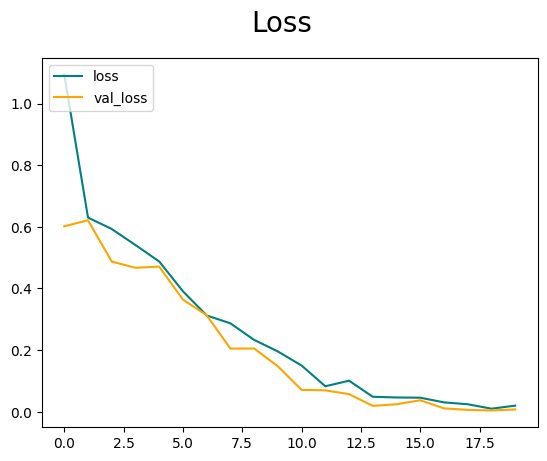

In [70]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label='val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

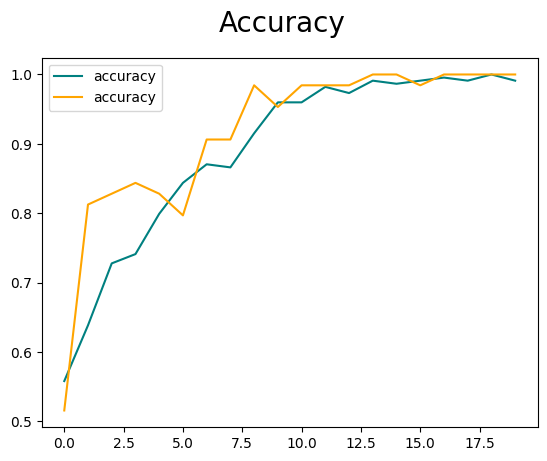

In [88]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label='accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

In [72]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [73]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [74]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model1.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 95ms/step


In [75]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


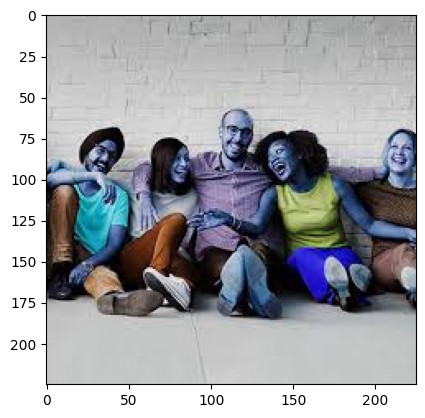

In [76]:
img = cv2.imread('happytest.jpeg')
plt.imshow(img)
plt.show()

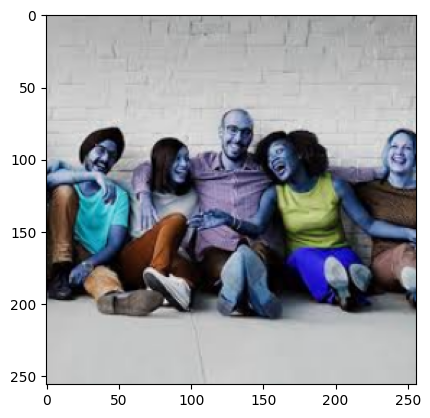

In [77]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [78]:
yhat = model1.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 20ms/step


In [79]:
yhat

array([[0.00497246]], dtype=float32)

In [81]:
if yhat < 0.5:
    print('Predicted class is haapy')
else:
    print('Predicted class is sad')

Predicted class is haapy


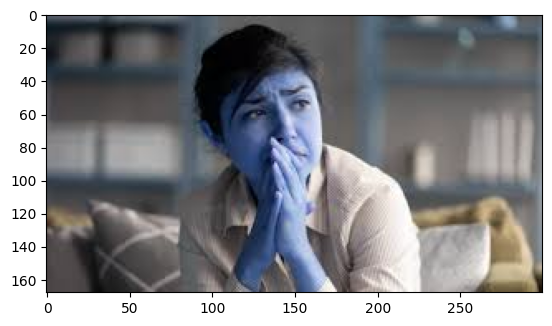

In [83]:
img2 = cv2.imread('sadtest.jpeg')
plt.imshow(img2)
plt.show()

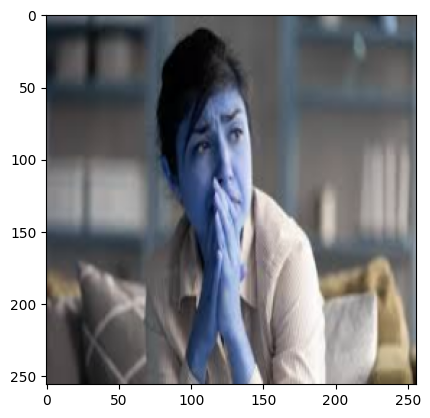

In [84]:
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [85]:
yhat = model1.predict(np.expand_dims(resize2/256, 0))

1/1 [==============================] - 0s 17ms/step


In [86]:
yhat

array([[0.98785555]], dtype=float32)

In [87]:
if yhat < 0.5:
    print('Predicted class is haapy')
else:
    print('Predicted class is sad')

Predicted class is sad


In [90]:
from tensorflow.keras.models import load_model

In [91]:
model1.save(os.path.join('models', 'happysadmodel.h5'))

/Users/aoamacsplace/Documents/DS-Projects/Image-classification/imgclenv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [92]:
newmodel = load_model(os.path.join('models', 'happysadmodel.h5'))